<h1> Reem Khaled Elsayed Aboushama </h1>  </br>  <h2>Data Mining and Business Intelligence</h2> </br> <h2> CSE 382 </h2>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from sklearn import svm
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import matplotlib.colors as colors


<h2>Reading the data<h2>

In [26]:
data = pd.read_csv(r"creditcard.csv")


<h1> Data Preprocessing </h1>

<H3>Checking if data import was successful </H3>

In [27]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


<b> checking data types of attributes</b>

In [28]:
data.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

<b> No N/A values, </br> all are float, and one is int, we can proceed </b>

<b>checking that values of dependent variable contains 0s and 1s only </b>

In [29]:
data['Class'].unique()

array([0, 1], dtype=int64)

<b> no mistakes in data entry</b>

<h2>Checking if there are missing data </h2>

In [30]:
data.shape
rows_without_missing_data = data.dropna()
rows_without_missing_data.shape
print('all rows:{}'.format(data.shape))
print('rows without missing data:{}'.format(rows_without_missing_data.shape))

all rows:(284807, 31)
rows without missing data:(284807, 31)


<b> therefore no missing data</b>

<h2> Data Normalization</h2>
<b> In an attempt to reduce any data duplictes or redundancies if present</b>

In [31]:
data=(data-data.min())/(data.max()-data.min())
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
5,0.000012,0.951057,0.777393,0.857187,0.244472,0.768550,0.262721,0.268257,0.788178,0.443190,...,0.558122,0.483915,0.665042,0.332185,0.564839,0.442749,0.421196,0.314769,0.000143,0.0
6,0.000023,0.979184,0.768746,0.838200,0.305241,0.767008,0.265762,0.265324,0.786257,0.478797,...,0.558776,0.497402,0.663145,0.277122,0.620014,0.383429,0.417148,0.313229,0.000194,0.0
7,0.000041,0.947348,0.782220,0.856031,0.230111,0.772104,0.267324,0.272183,0.744539,0.483978,...,0.592809,0.462660,0.666288,0.294686,0.554597,0.417014,0.394234,0.291099,0.001588,0.0
8,0.000041,0.943101,0.770278,0.835452,0.239894,0.783688,0.300439,0.267610,0.794515,0.449275,...,0.560296,0.497525,0.662401,0.518546,0.598855,0.362697,0.416728,0.316014,0.003628,0.0
9,0.000052,0.952547,0.779072,0.855511,0.242081,0.769078,0.260539,0.269325,0.786131,0.437401,...,0.557499,0.480466,0.663640,0.330349,0.573992,0.440836,0.421056,0.314810,0.000143,0.0


<b>dropping time attribute since it seems to be assigning random values and doesnt help us in our prediction </b>

In [32]:
data = data.drop('Time', axis =1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


<h1> Finding Correlations </h1>

It was stated that all the variables in the  given dataset are principal components </br>
Mathematically, this means they are orthogonal to each other (90 degree angle between them)</br>
Therefore, all those variables are independent from each other</br>
However, we can try and find correlation between "Class" attribute (the dependent variable), and the independent variables. </br>
Below is a heat map showing the 10 variables that have the strongest correlation with the "Class" variable.

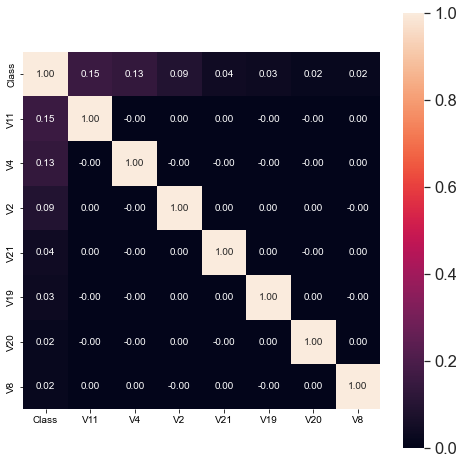

In [33]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

#casting class attribute to Int, to make it easier to deal with
data['Class']=data['Class'].astype(int)

correlation_ground = data.corr()
k = 8 # this is the number of variables in the heatmap
columns = correlation_ground.nlargest(k, 'Class')['Class'].index

cm = np.corrcoef(data[columns].values.T)

f, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.50)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

<b> This shows that Variable 11 has the strongest correlation within variables between "Class" values, this means it is the most influential attribute on the dependent variable<b>

<h2> Observing Distribution using Violin Plot</h2> </br>


Using <b>violin plot</b>  to view the distribution of each feature according to <b>"Fraud"</b> or <b>"Not Fraud".</b> </br>
Whether a credit card transaction is a fraud or not. </br>
A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side.

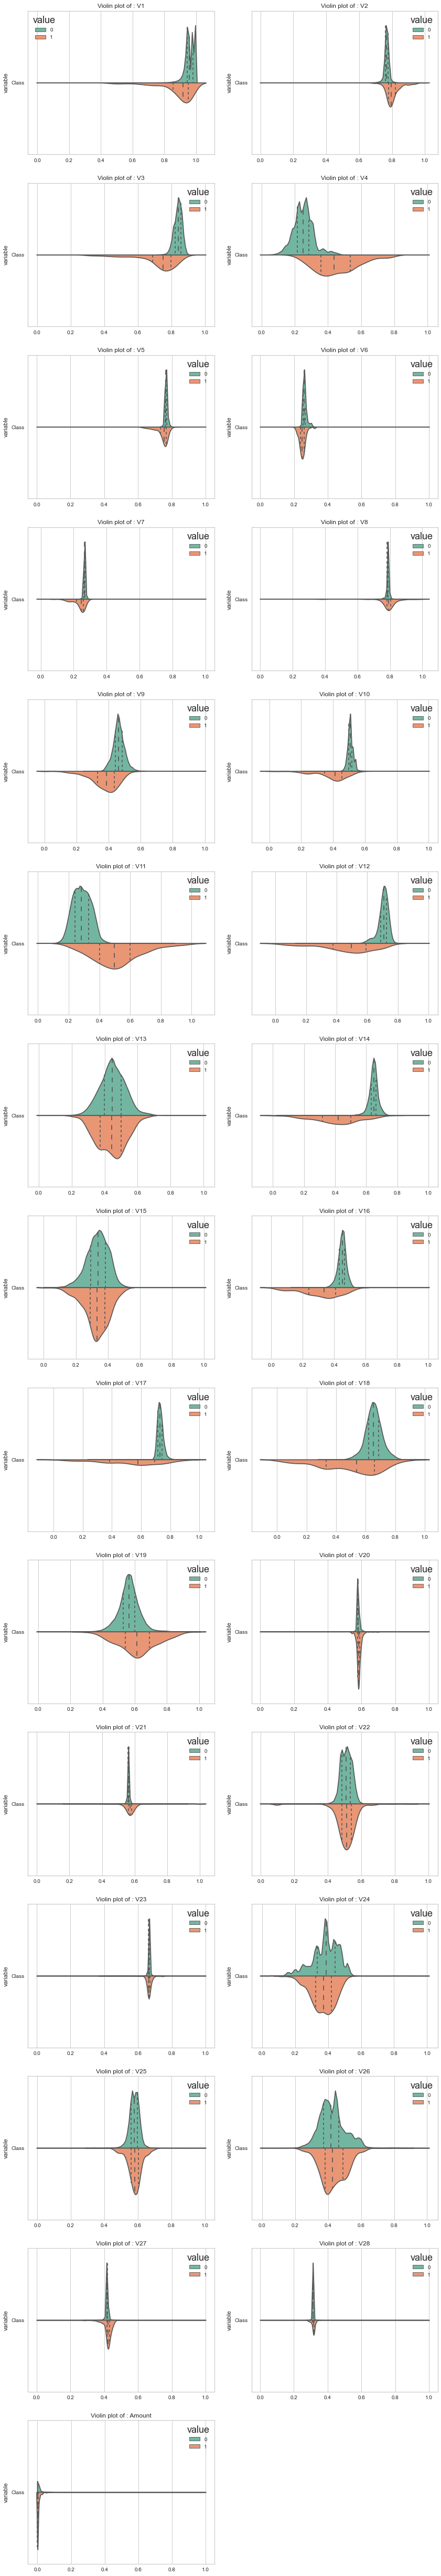

In [53]:
dt = 'float64'
col = data.columns[data.dtypes==dt]

plt.figure(figsize=(14,len(col)*6))
gs = gridspec.GridSpec(len(col),2)
for i, cn in enumerate(data[col]):
    ax = plt.subplot(gs[i])
    
    data_1  = pd.concat([data[cn], data.Class], axis=1)
    data_2  = pd.melt(data_1,id_vars=cn)
    sns.violinplot( x=cn, y='variable', hue="value"
                   ,data=data_2, palette="Set2", split=True
                   ,inner="quartile")
   
    ax.set_xlabel('')
    
    ax.set_title('Violin plot of : ' + str(cn))
    
    
plt.show()

<b> it was mentioned in dataset decription that there are 492 frauds only, checking ver</b>

0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:ylabel='Type'>

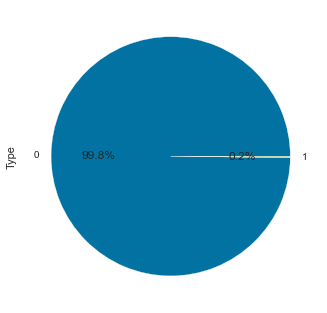

In [36]:
print(data["Class"].value_counts())
data.groupby('Class').size().plot(kind='pie',
                                       y = "Class",
                                       label = "Type",
                                       autopct='%1.1f%%')

<b> this is true, data only contains 492 1's, meaning 492 frauds

<h1> A. Classification </h1>

<h1>  SVM</h1>

In [37]:
len(data)

284807

dataset is relatively big for SVM to funtion fast enough, so we down sample the data so that it doesnt take much time optimizing with cross validation

In [38]:
data_fraud = data[data['Class']==1]
data_not_fraud = data[data['Class']==0]

In [39]:
len(data_fraud)

492

This shows that data was split correctly 
"The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions." from info about data set

In [40]:
from sklearn.utils import resample
data_not_fraud_downsampled = resample(data_not_fraud,
                                                     replace=False,
                                                     n_samples = 1000,
                                                     random_state = 42)
len(data_not_fraud_downsampled)
print(data_not_fraud_downsampled.shape)

(1000, 30)


In [41]:
from sklearn.utils import resample
data_fraud_downsampled = resample(data_fraud,
                                 replace=False,
                                 n_samples = 492,
                                random_state = 42)
len(data_not_fraud_downsampled)
print(data_not_fraud_downsampled.shape)

(1000, 30)


In [42]:
data_downsampled = pd.concat([data_not_fraud_downsampled, data_fraud_downsampled])
len(data_downsampled)

1492

now all is working, data not fraud sampled to 1000, fraud still remains 492

<h2> Splitting the Data</h2>

In [43]:
X = data_downsampled.drop('Class', axis = 1).copy()
X.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
138028,0.980626,0.773491,0.825863,0.283695,0.767749,0.251704,0.267725,0.782292,0.458228,0.496355,...,0.579647,0.558734,0.489988,0.663335,0.355258,0.613803,0.490702,0.415877,0.313767,0.00003


In [44]:
y = data_downsampled['Class'].copy()
print(y)

138028    0
63099     0
73411     0
164247    0
148999    0
         ..
41395     1
142557    1
154720    1
239499    1
33276     1
Name: Class, Length: 1492, dtype: int32


In [45]:
len(X)

1492

In [46]:
len(y)

1492

<b>Scaling data so that each column has a mean value of 0 and standarrd deviation of 1, we do it separately for training and testing in order to avoid data leakage. 
we do not need to scale y train as it is just 0 and 1 values </b> 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [48]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

<h1> Hyperparameter Tuning Using Grid Search</h1>

In [49]:
svm_classifier_org = svm.SVC()
svm_classifier_org.fit(X_train_scaled,y_train)
svm_classifier_org.n_support_
svm_classifier_org.support_ 

array([   3,   13,   19,   24,   30,   61,   72,   80,   83,   89,  106,
        121,  122,  133,  137,  144,  145,  155,  157,  158,  176,  177,
        185,  201,  209,  212,  219,  226,  227,  231,  241,  256,  259,
        275,  279,  283,  286,  293,  297,  305,  306,  314,  325,  326,
        334,  343,  359,  368,  370,  381,  387,  390,  398,  406,  461,
        465,  466,  473,  483,  494,  502,  509,  511,  517,  524,  527,
        538,  541,  552,  576,  583,  595,  597,  602,  614,  622,  629,
        631,  632,  650,  674,  725,  740,  742,  777,  790,  794,  803,
        810,  834,  835,  848,  852,  870,  872,  889,  921,  924,  927,
        931,  955,  964,  969,  977,  988, 1000, 1011, 1032,   22,   29,
         43,   67,   69,   92,   94,  101,  112,  120,  127,  128,  130,
        151,  171,  173,  180,  190,  233,  244,  257,  271,  285,  307,
        316,  320,  321,  338,  345,  352,  356,  358,  362,  371,  377,
        382,  389,  391,  394,  396,  402,  422,  4

In [50]:
#Grid search parameters for Hyper Tuning
from sklearn.model_selection import GridSearchCV

param_grid = { 'C':[0.001,0.01,0.1,1, 10, 100],
               'kernel':['rbf','poly','sigmoid','linear'],
               'degree':[2,3,4,5,6],
               'gamma': ['scale','auto',1, 0.1, 0.01, 0.001, 0.0001],
               'class_weight':['balanced']}

svm_classifier = GridSearchCV(svm_classifier_org, param_grid, cv=5, scoring='accuracy', verbose=True)
# fitting the model for grid search
svm_classifier.fit(X_train_scaled, y_train)
print(svm_classifier.best_estimator_)
print("Optimal Hyperparameters: ", svm_classifier.best_params_)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
SVC(C=1, class_weight='balanced', degree=2)
Optimal Hyperparameters:  {'C': 1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


<h1> Building SVM with optimal parameter</h1>

In [51]:
svm_optimal_classifier = SVC(random_state= 42,  C= 1, class_weight = "balanced" , degree=2, gamma = "scale", kernel = "rbf")


In [54]:
svm_optimal_classifier.fit(X_train_scaled, y_train)

SVC(C=1, class_weight='balanced', degree=2, random_state=42)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


c:\users\reemk\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


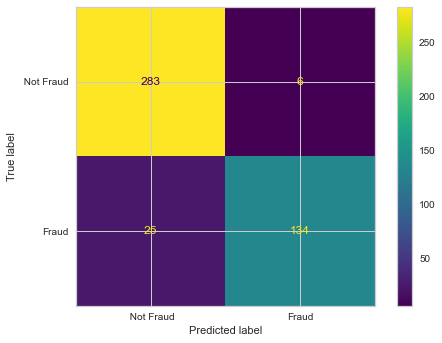

In [56]:
plot_confusion_matrix(svm_optimal_classifier, X_test_scaled, y_test, values_format = "d", display_labels = [" Not Fraud" , "Fraud"])

In [57]:
print('Training Accuracy = ' + str(svm_optimal_classifier.score(X_train_scaled, y_train)))
print('Testing Accuracy = ' + str(svm_optimal_classifier.score(X_test_scaled, y_test)))

Training Accuracy = 0.9741379310344828
Testing Accuracy = 0.9308035714285714


<b>the difference between the training accuracy and the testing acuuracy is relatively good, since ther eis little difference, it means that no or very little overfitting is taking place. </b>

In [58]:
y_pred = svm_optimal_classifier.predict(X_test_scaled)


In [59]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

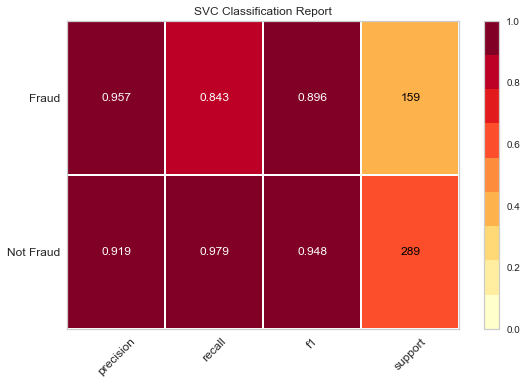

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [60]:
classes = ["Not Fraud", "Fraud"]
visualizer = ClassificationReport(svm_optimal_classifier, classes=classes, support=True)
visualizer.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show()  

<b>Precision </b>
Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”
recall
</br>
<b>Recall </b>
Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”
</br>


<b>F1 score</b>
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
</br>


<b>Support</b>
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.
</br>

<b> Precision will tell you how many you guessed positive that were not. (False Positives). 50% recall would be bad meaning you're not guessing many of your imbalanced class,</b>

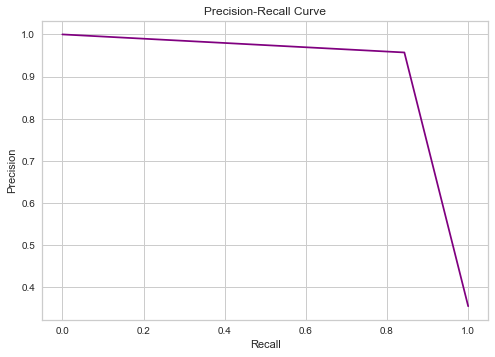

In [61]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

<h1> Visualizing the Data</h1>

we have 30 coloumsn meaning we have 30 dimensions, we need to collapse dimensions in order to plot it
we will use Principal Component Analysis to combine 30 features into 2 meta-features that are orthogonal
first, we calculate accuracy of plot beore drawing it, f its not useful, it will be dismissed
used scree plot 

In [62]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
per_var = np.round(pca.explained_variance_ratio_ * 100 , decimals = 1)

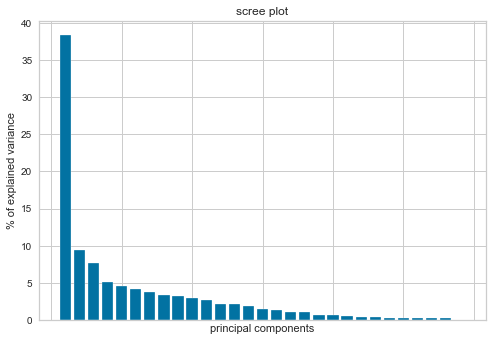

In [63]:
plt.bar(x=range(1, len(per_var)+1), height = per_var)
plt.tick_params(axis= 'x',  which = 'both', bottom = False, top = False , labelbottom= False)

plt.ylabel('% of explained variance')
plt.xlabel('principal components')
plt.title('scree plot')
plt.show()

the scree plot shows thar the first variable is indeed standing out from others and can be used to describe the others, as it accounts to a large amount of variation in the data therefore it will be a good candidate for the x aix of the 2-dimensional graph. however, second variable barely stands out from the rest, this is bad, however we can still draw the graph

In [64]:
train_pc1_coords = X_train_pca[: , 0]
train_pc2_coords = X_train_pca[: , 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))



param_grid = { 'C':[0.001,0.01,0.1,1, 10, 100],
               'kernel':['rbf','poly','sigmoid','linear'],
               'degree':[2,3,4,5,6],
               'gamma': ['scale','auto',1, 0.1, 0.01, 0.001, 0.0001],
               'class_weight':['balanced']}

svm_classifier = GridSearchCV(svm_classifier_org, param_grid, cv=5, scoring='accuracy', verbose=True)
# fitting the model for grid search
svm_classifier.fit(pca_train_scaled, y_train)
print(svm_classifier.best_estimator_)
print("Optimal Hyperparameters: ", svm_classifier.best_params_)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
SVC(C=0.1, class_weight='balanced', degree=2, kernel='linear')
Optimal Hyperparameters:  {'C': 0.1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


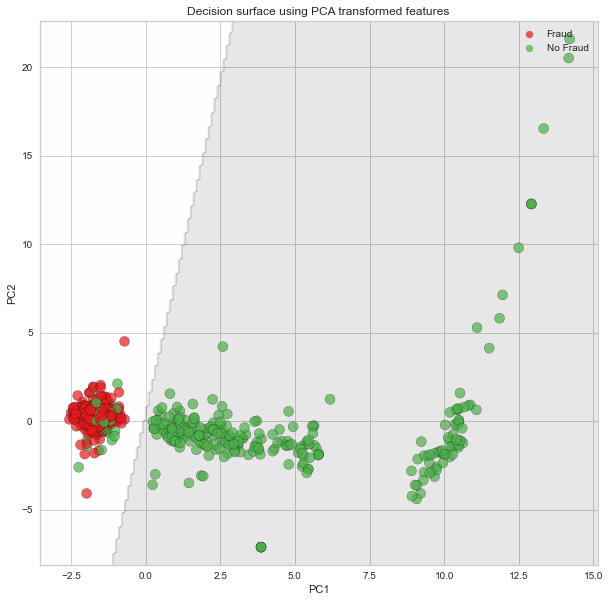

In [65]:

svm_classifier = SVC(random_state = 42, C = 0.1, class_weight = 'balanced', degree = 2, gamma='scale', kernel = 'linear')
svm_classifier.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

#matrix of points that will we will use to show the decison regions
x_min= test_pc1_coords.min() -1 
x_max = test_pc1_coords.max() +1 

y_min= test_pc2_coords.min() -1 
y_max = test_pc2_coords.max() +1 
#pionts on one side of classification boundary will be assigned a 0, and points on other side will be assigned a 1
xx,yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step = 0.1), 
                   np.arange(start=y_min, stop= y_max, step= 0.1))
Z= svm_classifier.predict(np.column_stack((xx.ravel(), yy.ravel())))
#now Z contains 0 and 1s describing how each point was classified, we reshape it so that each 
#classification corressponds to a specific point in the matrix

Z= Z.reshape(xx.shape)

import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx,yy, Z, alpha = 0.1)
cmap =colors.ListedColormap(["#e41a1c","#4daf4a"])
# we can set alpha to 0.7 to see if we are covering  up a point
scatter =ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, cmap=cmap, s=100, edgecolors='k', alpha=0.7)

legend  =ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1], 
                  loc= "upper right")

legend.get_texts()[0].set_text("Fraud")
legend.get_texts()[1].set_text("No Fraud")

ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
ax.set_title("Decision surface using PCA transformed features")
plt.show()





<h1> Naive Bayes</h1>

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, datasets

In [68]:
X = data_downsampled.drop('Class', axis = 1).copy()
y = data_downsampled['Class'].copy()


In [ ]:
<Splitting Data into Training and Testing Datasets>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

<h1> B. Clustering </h1>

<h1> K-Means Clustering</h1>

<h2> Implementing K-Means with the use of Elbow Method</h2>

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


<h3> Scaling the Data</h3>

<h2> Finding Optimum K By Elbow Method</h2>

In [4]:
km = KMeans(n_clusters = 3)
data['cluster'] = km.fit_predict(data)

In [5]:
dist_data = []
for num_clusters in range(1,6):
    km= KMeans(n_clusters=num_clusters)
    km.fit(data)
    dist_data.append([num_clusters,km.inertia_])
dist_data = pd.DataFrame(dist_data, columns = ['Number of Clusters', 'Distance'])
#checking error with different number of clusters from 1 to 11, error is corresponding to distance between datapoints

In [6]:
dist_data

,Number of Clusters,Distance
0,1,6.422907e+14
1,2,1.183201e+14
2,3,6.300272e+13
3,4,3.567895e+13
4,5,2.368439e+13


Text(0.5, 1.0, 'K-Means Elbow Method')

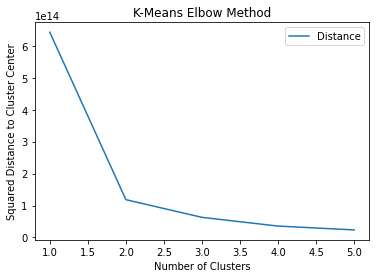

In [7]:
dist_data.set_index('Number of Clusters').plot()
plt.xlabel('Number of Clusters')
plt.ylabel('Squared Distance to Cluster Center')
plt.title("K-Means Elbow Method")

this shows that the optimim number of K would be 2

In [14]:
km = KMeans(n_clusters=2)
data['cluster'] = km.fit_predict(data)
#creating new column in dataframe to record cluster outputs

In [15]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,cluster
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [16]:
data.cluster.value_counts()

0    153163
1    131644
Name: cluster, dtype: int64

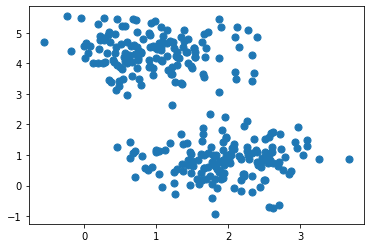

In [17]:
X, y_true = make_blobs(n_samples=300, centers=2,cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

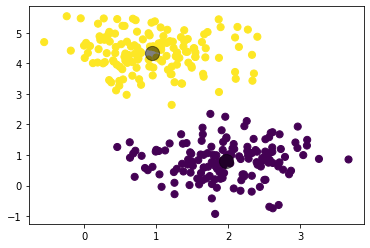

In [24]:
kmeans = KMeans(n_clusters=2) #divide the data to 3 clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<different clusters with different Ks>